In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import pandas as pd
import geopandas as gpd
import numpy as np

In [2]:
bigp = ['AL', 'BNP', 'Jamaat', 'JaPa']
mainp = ['AL', 'BNP']
years = [1991, 1996, 2001, 2008]

In [3]:
dfs = pd.read_csv('data/election_summary.csv')
dfs.head()

,year,valid,invalid,total,registered,turnout_pc
0,1991,34103677,374026,34477703,62181743,55.45
1,1996,42418274,462302,42880576,56716935,75.60
2,2001,55736625,449082,56185707,74946364,74.97
3,2008,70012191,636294,70648485,81087003,87.13


In [4]:
dfp = pd.read_csv('data/party_result.csv')
dfp.head()

,year,party,votes,votes_pc,seats
0,1991,BNP,10507549,30.81,140
1,1991,AL,10259866,30.08,88
2,1991,Jamaat,4136661,12.13,18
3,1991,JaPa,4063537,11.92,35
4,1991,BAKSAL,616014,1.81,5


In [5]:
# only keep big parties
dfp = dfp[dfp.party.isin(bigp)][['year', 'party', 'votes_pc']]
dfp.head()

,year,party,votes_pc
0,1991,BNP,30.81
1,1991,AL,30.08
2,1991,Jamaat,12.13
3,1991,JaPa,11.92
76,1996,AL,37.44


In [10]:
# get turnout % for given election year
dfp['turnout_pc'] = dfp.year.apply(lambda year: dfs[dfs['year'] == year]['turnout_pc'].item())
dfp.head()

,year,party,votes_pc,turnout_pc
0,1991,BNP,30.81,55.45
1,1991,AL,30.08,55.45
2,1991,Jamaat,12.13,55.45
3,1991,JaPa,11.92,55.45
76,1996,AL,37.44,75.60


In [11]:
# find votes % of each party with respect to turnout
# equivalent to % of votes out of total registered voters for a given year
dfp['votes_turnout_pc'] = dfp.apply(lambda row: round(row['turnout_pc'] * row['votes_pc'] / 100, 2), axis=1)
dfp.head()

,year,party,votes_pc,turnout_pc,votes_turnout_pc
0,1991,BNP,30.81,55.45,17.08
1,1991,AL,30.08,55.45,16.68
2,1991,Jamaat,12.13,55.45,6.73
3,1991,JaPa,11.92,55.45,6.61
76,1996,AL,37.44,75.60,28.30


In [13]:
# form the table containing vote % of each party out of total registered voters
# and % of votes casted out of total registered voters (turnout %)
dfvtpc = dfp.pivot(index='year', columns='party', values='votes_turnout_pc')
dfvtpc = dfvtpc.merge(dfs[['year', 'turnout_pc']], how='left', left_index=True, right_on='year').set_index('year')
dfvtpc.head()

,AL,BNP,JaPa,Jamaat,turnout_pc
year,,,,,
1991,16.68,17.08,6.61,6.73,55.45
1996,28.30,25.41,12.40,6.51,75.60
2001,30.09,30.72,NaN,3.21,74.97
2008,41.86,28.32,6.13,4.10,87.13


In [14]:
dfvtpc.to_csv('dataout/bigp_votepc_turnout.csv')

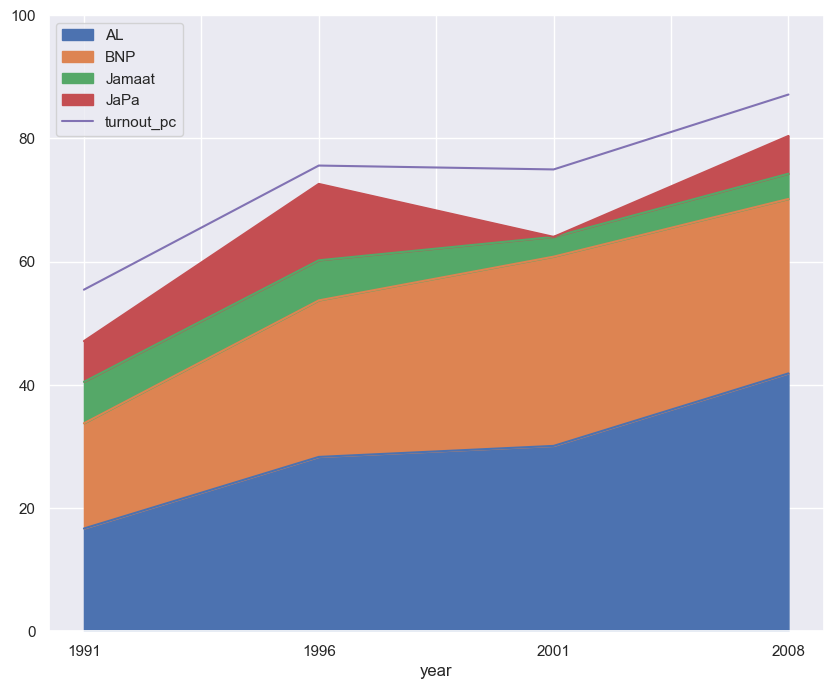

In [16]:
# plot stacked area
dfvtpc.index = dfvtpc.index.map(str)

fig, ax = plt.subplots(figsize=(10, 8))
dfvtpc.plot.area(ax=ax, y=bigp)
dfvtpc.plot.line(y='turnout_pc', ax=ax)
ax.set_ylim([0, 100])
fig.savefig('fig/bigp_votepc_turnout',bbox_inches='tight')

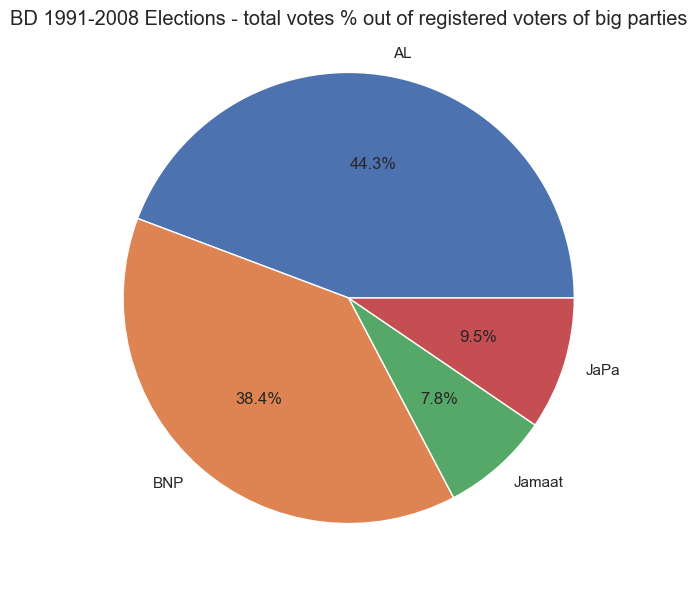

In [21]:
# plot total votes % out of registered voters of all 4 elections for big parties
bigp_vtpc_sums = dfvtpc[bigp].sum()

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(bigp_vtpc_sums, labels=bigp, autopct='%1.1f%%')        
fig.tight_layout()
plt.suptitle('BD 1991-2008 Elections - total votes % out of registered voters of big parties')
fig.savefig('fig/bigp_votepc_turnout_sum',bbox_inches='tight')
plt.show()